# Project: Investigate "No Show Appointments-2016" Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

Patients who fail to show up to scheduled appointments or cancel at the last minute- giving the health center no opportunity to fill the appointment slot- are often referred as **No Shows**.
No show appointments result in loss of time and money for health center and disrupts ccontinuity of care of patients.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    ● "ScheduledDay" tells us on what day the patient set up their appointment.
    ● "Neighborhood" indicates the location of the hospital.
    ● "Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program.
    ● "No Show" indicates whether the patient existed in the date (No), or got abscent (Yes)
    

We will discover the main parameters that combine most of the No-Shows with the dataset, 
Whether they are male/female, the average age, their neighbourhood, scholarhip holders.
Whether they recieved an SMS, diagnosed with any type of disease( Hipertension, Diabetes, Alcoholism, Handicapped).

We will try to build the report around the analysis of at least one dependent variable(No-Show) and three independent variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df = pd.read_csv("noshowappointments-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling


### General Properties

We wouldn't need such useless data (PatientID, AppointmentID) so we will drop them

In [2]:
df.drop(["PatientId", "AppointmentID"], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


As **"No Show"** the main parameter to be explored, we need to make sure that it has only two Uniques values; ["Yes", "No"], so we will check for that, beside checking for other values uniques:-

In [3]:
df.nunique()

Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Great, the unique values seem to be adequate.

Now we will begin discovering our DataSet with some describe( ) , info( ) function

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


Fortunately we don't have any missing Cells. Also the datatypes for all cells are adequate and don't need to be converted.

We also need to check if there are any Duplicates!

In [5]:
df.duplicated().sum()

635

We have found **635 duplicates** which we need to remove in the Cleaning Section!

Let's now discover more stats about the DataFrame 

In [6]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we find that the Average Age that we are dealing with is 37 years old, with a range of (-1 : 115)!! This means that we need to discover the ages in details to check if there is someone who is -1 years old! :D

We will need to drop any row with 'Age' less than 0

### Data Cleaning

Let's begin with removing Duplicates firstly:

In [7]:
##Using Drop Duplicates Method to drop Duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

Great, now let's solve the problem of -ve Age!!

In [8]:
## Analyzing the -ve Age rows
df[df['Age'] <0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
## Using Drop Method to drop -ve age
df.drop(df[df['Age']< 0].index, inplace = True)
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000
mean,37.089853,0.098288,0.197250,0.071826,0.030430,0.022131,0.322884
std,23.121015,0.297705,0.397924,0.258200,0.171769,0.160879,0.467581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now we have the data clean, with age range from 0 to 115 and with a mean 37 years old

Let's recheck for any Nan Values with the following isnull( ) function

In [10]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 

#### Does the gender of the patient has any relation for being No Show, Which gender tends to show higher range of No Show?

First, we need to query the dataframe with the gender

In [11]:
def create_my_df(dataFrame,column, value):
    return dataFrame[dataFrame[column] == value]

In [12]:
##Using Query Method to generate the Male DF
df_m = create_my_df(df, 'Gender', 'M')
df_m.shape

(38475, 12)

In [13]:
m_count = len(df_m)
print("Males Count {}".format(m_count))

Males Count 38475


In [20]:
## Creating DF for Males with No Show
m_yes_count = len(create_my_df(df_m, 'No-show', 'Yes'))
## Creating DF for Males without No Show
m_no_count =len(create_my_df(df_m, 'No-show', 'No'))
print('Males that are No Show counts {}'.format(m_yes_count))
print('While Males that are Showed up counts {}'.format(m_no_count))

Males that are No Show counts 7643
While Males that are Showed up counts 30832


Here we find that males that were marked as **No Show**; didn't present in the reserved time are 7725

While the males that did presented in the appointment time are 30962

In [21]:
## Using Query Method to Create Females DF
df_f = df.query('Gender == "F"')
df_f.shape

(71416, 12)

In [22]:
f_count = len(df_f)
print("Females Count {}".format(f_count))

Females Count 71416


In [23]:
## Creating DF for female with No Show
f_yes_count = len(df_f[df_f['No-show'] == 'Yes'])
## Creating DF for female without No Show
f_no_count = len(df_f[df_f['No-show'] == 'No'])
print('Females that are No Show counts {}'.format(f_yes_count))
print('While Females that are Showed up counts {}'.format(f_no_count))

Females that are No Show counts 14455
While Females that are Showed up counts 56961


Here we find that females that were marked as **No Show**; didn't present in the reserved time are 14594

While the females that did presented in the appointment time are 57245

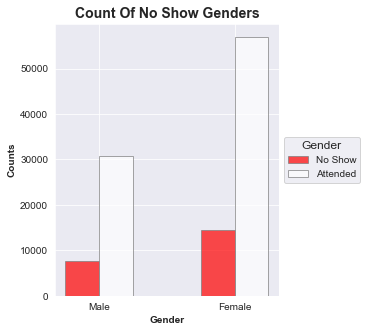

In [24]:
## Plotting Bar Chart showing No Show Male/Female Counts
fig = plt.subplots(figsize =(4, 5))

yes = [m_yes_count, f_yes_count]
no = [m_no_count, f_no_count]
width = 0.25
yes_br = np.arange(len(yes))
no_br = [x + width for x in yes_br]
plt.bar(yes_br, yes, color = 'r', width = width, edgecolor = 'grey',alpha=.7, label = 'No Show')
plt.bar(no_br, no, color = 'w', width = width , edgecolor = 'grey',alpha=.7, label = 'Attended')
plt.xticks([r + width/2 for r in range(len(yes))], ['Male', 'Female'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Gender", title_fontsize = 12);
plt.title('Count of No Show Genders'.title(),fontsize = 14, weight = "bold")
plt.xlabel('Gender'.title(),fontsize = 10, weight = "bold")
plt.ylabel('Counts'.title(),fontsize = 10, weight = "bold")
plt.show();

The previous statistic might be tricky! As the total number of canceled visits doesn't have an adequate percentage for the whole number of the gender, you can notice that Males counts 38687, while Females counts 71839, which means that female counts approximately the double of Males Count.

In other words, to have a meaningful statistic we need to calculate the percentage of **No Show-gender** refering to the total number for each **Gender**

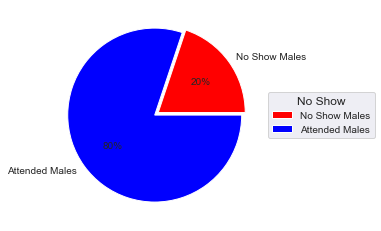

In [25]:
## Creating Pie Chart for Each Gender to present No Show Percentage
m_percentage = np.array([m_yes_count, m_no_count])
m_labels = ["No Show Males", "Attended Males"]
colors = ['r','b']

plt.pie(m_percentage, 
        labels = m_labels, 
        colors = colors, 
        explode = (0.05,0), autopct = lambda p : '{:0.0f}%'.format(p))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="No Show", title_fontsize = 12);

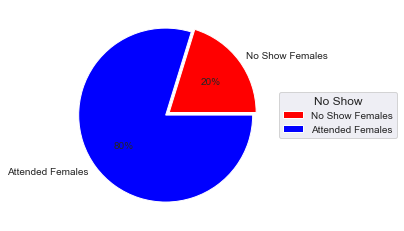

In [26]:
f_percentage = np.array([f_yes_count, f_no_count])
f_labels = ["No Show Females", "Attended Females"]
plt.pie(f_percentage, 
        labels = f_labels, 
        colors = colors, 
        explode = (0.05,0), autopct = lambda p : '{:0.0f}%'.format(p))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="No Show", title_fontsize = 12);

Now we reached an answer to out question, Both Genders have approximately the same percentage of Being **No Show** which means that **Gender has no relation with No Show**

### Research Question 2 
#### Is there any relation between the Age and Being No-Show??

First of all, we need to see the Age Levels Distribution along the sample.

As an initial step, we can plot a histgram for tha age

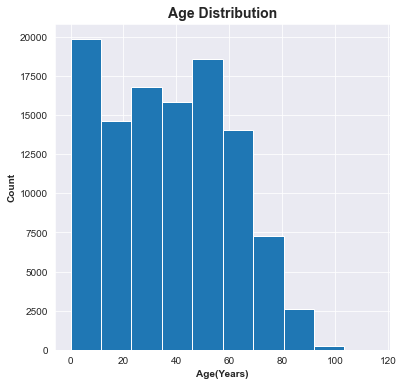

In [27]:
## Plotting Histogram for Ages.

df['Age'].hist(figsize = (6,6));
plt.title('Age Distribution'.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Age(Years)'.title(),
               fontsize = 10, weight = "bold")

plt.ylabel('Count'.title(),
               fontsize = 10, weight = "bold");

We will divide the age ranges as Min, 25%, 50%, 75%, Max

In [28]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000
mean,37.089853,0.098288,0.197250,0.071826,0.030430,0.022131,0.322884
std,23.121015,0.297705,0.397924,0.258200,0.171769,0.160879,0.467581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We need to study the age by ranging to 

    - Min             (0)
    - Children(25%)   (0-18)
    - Youths(50%)     (19-37)
    - MidYears(75%)   (38-55)
    - Elders          (56-115)
    - Max             (115)
    
We will set the bin Edges as follow [0, 18, 37, 55, 115]

And we will set the bin Labels as follow ['Children', 'Youths', 'MidYears', 'Elders']

In [29]:
## Creating Bins and Bins Names for each Age Level
bin_edges = [0,18,37,55,115]
bin_names = ['Children', 'Youths', 'MidYears', 'Elders']

We will use cut( ) function to cut the ages with the previous Levels

In [30]:
## Using Cut Method to Cut the ages into Levels

df['Age_level'] = pd.cut(df['Age'], bin_edges, labels = bin_names)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_level
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Elders
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Elders
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Elders
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Elders


Now let's discover each Age Level Counts 

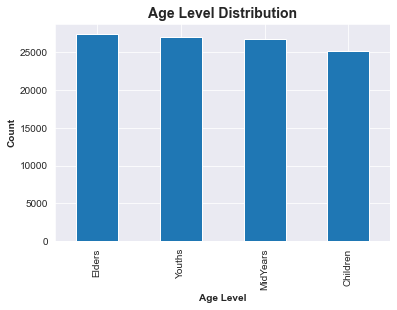

In [31]:
##Drawing Bar Chart showing Each Age Level Count

df['Age_level'].value_counts().plot(kind = 'bar', figsize = (6,4));
plt.title('Age Level Distribution'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Age Level'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Count'.title(),
               fontsize = 10, weight = "bold");

Finally, we will plot the **No-Show** cases according to the **Age Levels** created above , **we will make it with the same index of the previous graph**

In [32]:
index = df['Age_level'].value_counts().index

In [33]:
df_yes = df[df['No-show'] == 'Yes']
df_yes.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_level
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Youths
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,MidYears
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,Youths
17,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes,MidYears
20,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,Youths


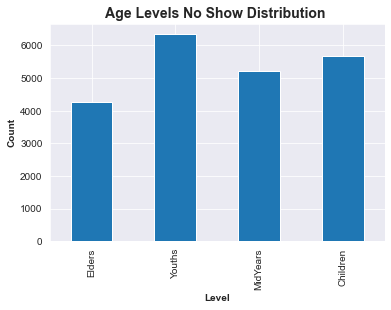

In [34]:
df_yes['Age_level'].value_counts()[index].plot(kind = 'bar', figsize = (6,4));
plt.title('Age Levels No Show Distribution '.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Level'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Count'.title(),
               fontsize = 10, weight = "bold");

As we see, Youths Levels are the most to be No-Show, then Children, reaching to MidYears and Finally Elders.

Again this might be a tricky analysis!! So let's analize deeply each Age Level whether to tend to a **No Show**

In [35]:
#Creating Lists for each Level to show its No Show Percentage
#levels array
age_levels = ["Elders","MidYears","Youths","Children"]
#No show Array
age_levels_yes = []
#Show Array
age_levels_no = []


Firstly let's make Lists, in another word; containers for the following data 

    - Age Levels List                                   ("age_levels")
    - Number for each Age Level that are No Show        ("age_levels_yes")
    - Number for each Age Level that are not No Show    ("age_levels_no")
    
 Now let's make a for loop to fill these containers

In [36]:
##For Loop to fill the Yes/ No Arrays
for level in age_levels:
    age_levels_yes.append(len(df[(df['Age_level'] == level) & (df['No-show'] == 'Yes')]))
    age_levels_no.append(len(df[(df['Age_level'] == level) & (df['No-show'] == 'No')]))
print("List of Being a No Show Numbers is {} on the same order of {}".format(age_levels_yes, age_levels))
print("List of Not Being a No Show Numbers is {} on the same order of {}".format(age_levels_no, age_levels))

List of Being a No Show Numbers is [4259, 5198, 6341, 5664] on the same order of ['Elders', 'MidYears', 'Youths', 'Children']
List of Not Being a No Show Numbers is [23112, 21553, 20709, 19525] on the same order of ['Elders', 'MidYears', 'Youths', 'Children']


Now let's graph each Level with two Bars representing No Show and Not a No Show

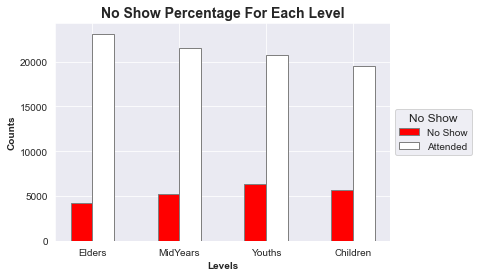

In [37]:
width = 0.25
age_levels_yes_br = np.arange(len(age_levels_yes))
age_levels_no_br = [x + width for x in age_levels_yes_br]
plt.bar(age_levels_yes_br, age_levels_yes, color = 'r', width = width, edgecolor = 'grey', label = 'No Show')
plt.bar(age_levels_no_br, age_levels_no, color = 'w', width = width , edgecolor = 'grey', label = 'Attended')
plt.xticks([r + width/2 for r in range(len(age_levels_yes_br))], age_levels)
plt.title('No Show Percentage for Each Level'.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Levels'.title(),
               fontsize = 10, weight = "bold")

plt.ylabel('Counts'.title(),
               fontsize = 10, weight = "bold")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="No Show", title_fontsize = 12);
plt.show();

Now we reach to the answer of the question: **Children** are the most in tendency to cancel their visit; **No Show**, then **Youths**, **MidYears** and finally the **Elders** 

### Research Question 3
#### Relation between Being No-Show and The Neighbourhood

Let's discover the highest locations that people from tends to get no Show

In [38]:
#Get the highest 5 Neighbourhoods to no show
highest_counts_yes = df_yes["Neighbourhood"].value_counts().head()
print("Largest 5 Neighbourhoods in No Show Counts is: \n\n{}".format(highest_counts_yes))

Largest 5 Neighbourhoods in No Show Counts is: 

JARDIM CAMBURI       1429
MARIA ORTIZ          1219
ITARARÉ               902
RESISTÊNCIA           885
JESUS DE NAZARETH     695
Name: Neighbourhood, dtype: int64


Here we can notice the highest 5 Neighbourhoods to show No Show Counts

    - JARDIM CAMBURI       1429
    - MARIA ORTIZ          1219
    - ITARARÉ               902
    - RESISTÊNCIA           885
    - JESUS DE NAZARETH     695

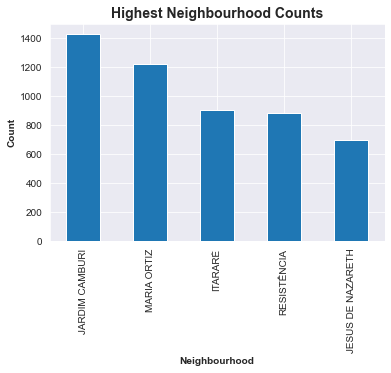

In [39]:
highest_counts_yes.plot(kind = 'bar', figsize = (6,4));
plt.title('Highest Neighbourhood Counts'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Neighbourhood'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Count'.title(),
               fontsize = 10, weight = "bold");

Again, here we have a tricky statistic, to correctly show this one we need to know the percentage of **No Show** per **Total Counts** for each city

In [40]:
Neighbourhood_array = np.array(highest_counts_yes.index.values)
print("Highest **No Show** Neighbourhdoods Array is\n{} \n".format(Neighbourhood_array))
#Container for Total Counts for the highest
total_counts =[]
for Neighbourhood in Neighbourhood_array:
      #DataFrame of each Neighbourhood of the Array
      df_neighbourhood = df[df['Neighbourhood'] == Neighbourhood]
      #Count of each Neighbourhood of the Array
      count = int(df_neighbourhood['Neighbourhood'].value_counts().values)
      total_counts.append(count)

print("Highest **No Show** Neighbourhoods total counts is\n{}".format(total_counts))

Highest **No Show** Neighbourhdoods Array is
['JARDIM CAMBURI' 'MARIA ORTIZ' 'ITARARÉ' 'RESISTÊNCIA'
 'JESUS DE NAZARETH'] 

Highest **No Show** Neighbourhoods total counts is
[7616, 5804, 3470, 4387, 2852]


Now let's graph the percentage per each Neighbourhood

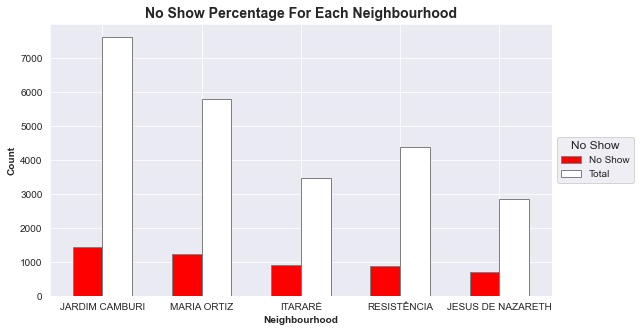

In [41]:
fig = plt.subplots(figsize =(9, 5))
width = 0.3
yes_br = np.arange(len(Neighbourhood_array))
total_br = [x + width for x in yes_br]
plt.bar(yes_br, highest_counts_yes.values, color = 'r', width = width, edgecolor = 'grey', label = 'No Show')
plt.bar(total_br, total_counts, color = 'w', width = width , edgecolor = 'grey', label = 'Total')
plt.xticks([r + width/2 for r in range(len(yes_br))], Neighbourhood_array)
plt.title('No Show Percentage for each Neighbourhood'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Neighbourhood'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Count'.title(),
               fontsize = 10, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="No Show", title_fontsize = 12)
plt.show();

Now we have tha most accurate data;

People from **ITRARE, JESUS DE NAZARETH** show the most tendency to be **No Show**

### Research Question 4
#### Relation between Being No-Show and having Scholarship, Hipertension, Diabetes, Alcoholism, Handicapped and Recieving SMS

In [42]:
#Creating Scholar DF
df_scholar = create_my_df(df, 'Scholarship', 1)
print("Count of having Scholarship is {}".format(len(df_scholar)))

Count of having Scholarship is 10801


In [43]:
#Creating Hiper DF
df_hiper = create_my_df(df,'Hipertension', 1)
print("Count of having Hipertension is {}".format(len(df_hiper)))

Count of having Hipertension is 21676


In [44]:
#Creating Diabetes DF
df_diabetes = create_my_df(df,"Diabetes", 1)
print("Count of having Diabetes is {}".format(len(df_diabetes)))

Count of having Diabetes is 7893


In [45]:
#Creating Alcoholism DF
df_alcohol = create_my_df(df,'Alcoholism',1)
print("Count of having Alcoholism is {}".format(len(df_alcohol)))

Count of having Alcoholism is 3344


In [46]:
#Creating Handcap DF
df_handcap = create_my_df(df, 'Handcap', 1)
print("Count of having Handicapped is {}".format(len(df_handcap)))

Count of having Handicapped is 2023


In [47]:
#Creating SMS DF
df_SMS = create_my_df(df, 'SMS_received', 1)
print("Count of having SMS-Received is {}".format(len(df_SMS)))

Count of having SMS-Received is 35482


In [48]:
##Creating Special Cases Array
special_cases_array = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
#Creating Special Cases Counts Array
special_cases_counts = [len(df[df[x] == 1]) for x in special_cases_array]
#Creating Special Cases No Show Counts Array
special_cases_yes_counts = [len(df_yes[df_yes[x] == 1]) for x in special_cases_array]

print("\nCount of Each Special Case is {} \nas per the following order {}\n \n "
      .format(special_cases_counts,special_cases_array))


print("Count of No Show for each Special Case is {} \nas per the following order {}"
      .format(special_cases_yes_counts, special_cases_array))


Count of Each Special Case is [10801, 21676, 7893, 3344, 2023, 35482] 
as per the following order ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
 
 
Count of No Show for each Special Case is [2556, 3728, 1422, 668, 358, 9784] 
as per the following order ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


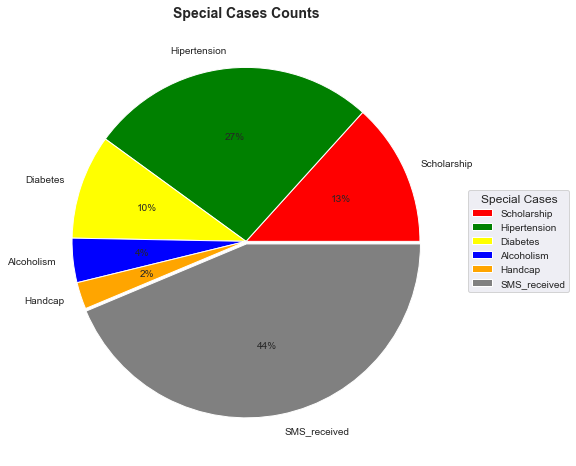

In [49]:
colors = ['Red', 'Green', 'Yellow', 'Blue', 'Orange', 'Grey']
fig = plt.subplots(figsize =(8, 8))
plt.pie(special_cases_counts, 
        labels = special_cases_array, 
        colors = colors,
        explode = (0,0,0,0,0,.015),
        autopct = lambda p : '{:0.0f}%'.format(p),
       )
plt.title('Special Cases Counts'.title(),
               fontsize = 14, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Special Cases", title_fontsize = 12);

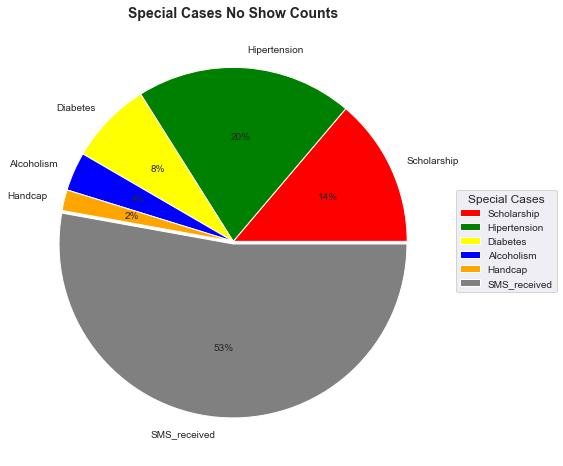

In [50]:
colors = ['Red', 'Green', 'Yellow', 'Blue', 'Orange', 'Grey']
fig = plt.subplots(figsize =(8, 8))
plt.pie(special_cases_yes_counts, 
        labels = special_cases_array, 
        colors = colors,
        explode = (0,0,0,0,0,0.015),
        autopct = lambda p : '{:0.0f}%'.format(p) 
       )
plt.title('Special Cases No Show Counts'.title(),
               fontsize = 14, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Special Cases", title_fontsize = 12);

Now we see that most of **No Show** cases **(Approximately 53%)** have recieved SMS. Which means that SMS hasn't any effect and we can make cost saving by Stopping Sending SMSs

Handcap, Alcoholism, Diabetes showed only 14% of **No Show cases**, which means these diseases might not be an important point of study.


Now let's make a deeper study for the remaining two points (Scholarship and Hipertension) that share approximately 14% and 20% respectibley of being **No Show**

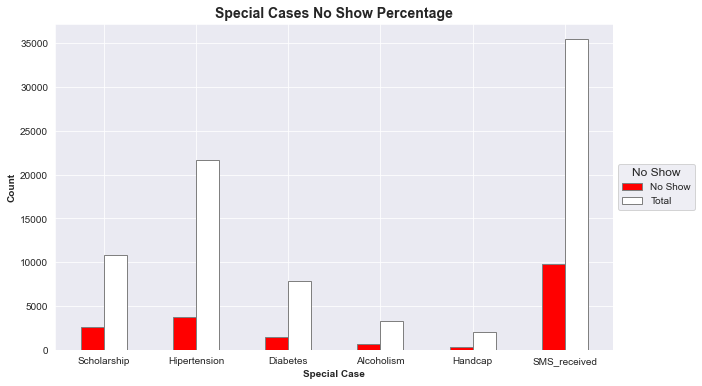

In [51]:
fig = plt.subplots(figsize =(10, 6))
width = 0.25
yes_br = np.arange(len(special_cases_yes_counts))
total_br = [x + width for x in yes_br]
plt.bar(yes_br, special_cases_yes_counts, color = 'r', width = width, edgecolor = 'grey', label = 'No Show')
plt.bar(total_br, special_cases_counts, color = 'w', width = width , edgecolor = 'grey', label = 'Total')
plt.xticks([r + width/2 for r in range(len(yes_br))], special_cases_array)
plt.title('Special Cases No Show Percentage'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Special Case'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Count'.title(),
               fontsize = 10, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="No Show", title_fontsize = 12);
plt.show();

Now we see that about 25% of both Scholarship and Hipertension are **No Show**, which means no clear indication for any relation between Scholarship and **No Show**

<a id='conclusions'></a>
## Conclusions

### Process Flow
As we may gone through the project, we went through the following steps:
    - We had cleaned our data frame
    - we made some processing for the data
    - we started with Gender Analysis
    - we went to age studying
    - Then we studied the neighbourhood effect
    - Finally we showed concern to the Neighbouorhood Analysis
    
Through these steps we got the following Conclusions:

### Conclusions
- Both Genders have approximately the same percentage of Being **No Show** which means that **Gender has no relation with No Show**
- Children** have the most in tendency to cancel their visit; **Being No Show**, then **Youths**, **MidYears** and finally the **Elders** 
- People from **ITRARE, JESUS DE NAZARETH** show the most tendency to be **No Show**
- Most of **No Show** cases **(Approximately 53%)** have recieved SMS. Which means that SMS hasn't any effect and we can make cost saving by Stopping Sending SMSs
- Handcap, Alcoholism, Diabetes showed only 14% of **No Show cases**, which means these diseases might not be an important point of study.

### Limitations:

- Although the data we had showed the neighbourhood, it didn't mention the distance between each neighbourhood and the clinic, in other words, we could't define if the distance between the patient location and the clinic is a paratmeter in defining the "No Show" Reasons or not.
- Profession or Education also were two important parameters in defining no show cases that the data missed out.

<a id='resources'></a>
## Resources:

- https://www.w3schools.com/python/